In [301]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Question 1

In [302]:
from discriminants import GaussianDiscriminant, MultivariateGaussian

In [303]:
# Setting a random seed for reproducibility
np.random.seed(40)

'''Create our dataset with labels'''
mu, sigma = 60, 5 # mean and standard deviation
resting_hr = np.random.normal(mu, sigma, 570)

mu, sigma = 100, 5 # mean and standard deviation
stress_hr = np.random.normal(mu, sigma, 430)

c:\Users\shubh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\shubh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


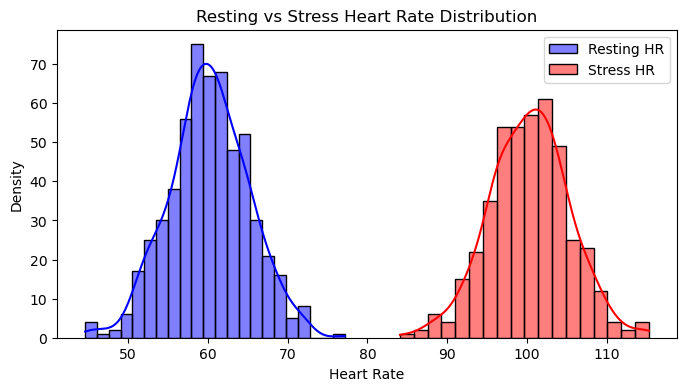

In [304]:
plt.figure(figsize=(8,4))

sns.histplot(resting_hr, kde=True, color="blue", label="Resting HR", alpha=0.5)
sns.histplot(stress_hr, kde=True, color="red", label="Stress HR", alpha=0.5)

plt.legend()
plt.title("Resting vs Stress Heart Rate Distribution")
plt.xlabel("Heart Rate")
plt.ylabel("Density")
plt.show()

Univariate gaussian distribution formula is : 

$$
g(x) = \log(\text{prior}) - 0.5 \log(2\pi\sigma^2) - 0.5 \frac{(x - \mu)^2}{\sigma^2}
$$


In [305]:
resting_model = GaussianDiscriminant(data=resting_hr, prior=0.5, name='Resting')
stress_model  = GaussianDiscriminant(data=stress_hr,  prior=0.5, name='Stressed')

In [306]:
# test values from 40 to 120 (prof mentioned in hw)
x_values = np.linspace(40, 120, 400)

# Calculate discriminant values for each x in test set
g_resting = []
g_stress  = []

for i in range(len(x_values)):
    g_resting.append(resting_model.calc_discriminant(x_values[i]))
    g_stress.append(stress_model.calc_discriminant(x_values[i]))

In [307]:
# calculating the decision boundary

min_diff = None
decision_boundary = None
for i in range(len(x_values)):
    diff = abs(g_resting[i] - g_stress[i])
    if (min_diff is None) or (diff < min_diff):
        min_diff = diff
        decision_boundary = x_values[i]

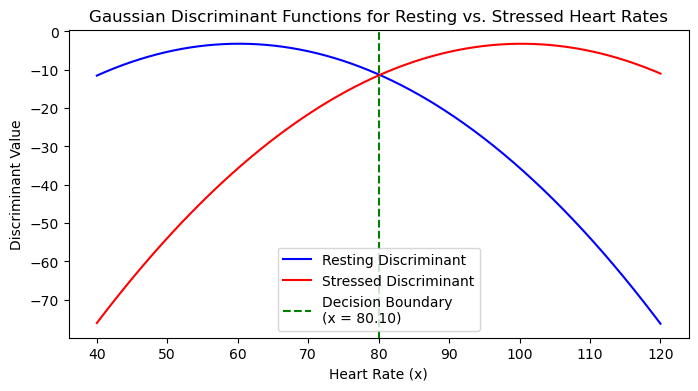

In [308]:
# Plotting the discriminant functions.

plt.figure(figsize=(8,4))
plt.plot(x_values, g_resting, label='Resting Discriminant', color='blue')
plt.plot(x_values, g_stress, label='Stressed Discriminant', color='red')
plt.axvline(x=decision_boundary, color='green', linestyle='--', label=f'Decision Boundary\n(x = {decision_boundary:.2f})')

plt.xlabel('Heart Rate (x)')
plt.ylabel('Discriminant Value')
plt.title('Gaussian Discriminant Functions for Resting vs. Stressed Heart Rates')
plt.legend()
plt.show()

Why the Two Discriminants Cross at 80 ?

It is because Both classes have equal priors and identical variances. The decision boundary occurs where the likelihoods are equal or the discriminant difference g(x1) - g(x2) = 0. For two Gaussian distributions with means 
$$
\mu_{\text{resting}} = 60 \quad \text{and} \quad \mu_{\text{stressed}} = 100,
$$
the decision boundary is at the midpoint:
$$
x = \frac{60 + 100}{2} = 80.
$$
At \(x = 80\), the discriminant functions of both classes are equal.

Why Each Discriminant Plot is Parabolic ?

The discriminant function for a Gaussian is given by:
$$
g(x) = \log (\text{prior}) - \frac{1}{2}\log(2\pi\sigma^2) - \frac{(x-\mu)^2}{2\sigma^2}.
$$
The term 
$$
-\frac{(x-\mu)^2}{2\sigma^2}
$$
is quadratic in \(x\) and we are also using a log function, which results in a parabolic shape when the function is plotted.

---

## Question 2

In [309]:
# Set a random seed for reproducibility
np.random.seed(42)

# Define parameters for the resting condition
mu_rest = np.array([60, 10])
sigma_rest = np.array([[20, 100],
                       [100, 20]])

# Define parameters for the stressed condition
mu_stress = np.array([100, 80])
sigma_stress = np.array([[50, 20],
                         [20, 50]])

# Generate synthetic data
# Let's say we generate 500 samples for each condition
resting_data = np.random.multivariate_normal(mu_rest, sigma_rest, 500)
stressed_data = np.random.multivariate_normal(mu_stress, sigma_stress, 500)

C:\Users\shubh\AppData\Local\Temp\ipykernel_79368\3792909279.py:16: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  resting_data = np.random.multivariate_normal(mu_rest, sigma_rest, 500)


In [310]:
resting_model = MultivariateGaussian(data=resting_data, prior=0.5, name='Resting')
stressed_model = MultivariateGaussian(data=stressed_data, prior=0.5, name='Stressed')